# 目標
- 小さなデータでsubmissionを目指す.

In [21]:
import sys
sys.path.append("../yandex/")
#sys.path.append("../lib/")
import os
import pandas as pd

import utils
import scoring
import calc_var as cv

#import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import swifter

%matplotlib inline
%load_ext autoreload
%autoreload
pd.set_option('display.max_columns', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# データの準備

In [2]:
DATA_PATH = "../your_data_dir/"

In [3]:
train, test = utils.load_data_csv(
    DATA_PATH, utils.SIMPLE_FEATURE_COLUMNS)

/Users/yoneda/.pyenv/versions/2.7.14/lib/python2.7/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## event数を絞る

In [37]:
sample = train.sample(100000)

In [6]:
sample.head()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
501694       56      32      15       8   2.053571   1.875000   1.133333   
2851800     104      23      17      18   3.836539   1.217391   1.411765   
4514347     170      27       7      12   3.141176   1.814815   1.428572   
2810866      64      13       8      12   2.015625   2.846154   1.750000   
1917936      88      24       9       8   2.431818   2.291667   1.222222   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
501694    1.000000     8                   2                   2   
2851800   1.111111     8                   2                   2   
4514347   1.000000     8                   2                   2   
2810866   1.250000     8                   2                   2   
1917936   8.875000     6                   2                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
501694                    2                   2         -726.205   
2851800                   2                   2          729.675   
4514347                   2                   2        -3093.080   
2810866                   2                   2        -3501.080   
1917936                   2                   0        -3348.080   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
501694          -729.825          -730.87          -782.07        904.65110   
2851800          814.435           911.60           975.22       -725.15765   
4514347        -3394.300         -3848.97         -4113.17        372.85458   
2810866        -3724.300         -4084.97         -4113.17      -2628.62600   
1917936        -3724.300         -4141.57         -9999.00      -3629.11940   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
501694         975.46550        1047.4010       1120.87130        15121.356   
2851800       -782.50354        -839.8801       -897.57180        15201.389   
4514347        401.36926         431.2050        462.57562        15119.441   
2810866      -2838.10960       -3046.3726      -3253.20020        15108.633   
1917936      -3918.00270       -4567.4688      -9999.00000        15105.030   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
501694         16325.812        17518.871        18727.234             6.375   
2851800        16408.482        17601.875        18810.568             6.375   
4514347        16323.744        17516.652        18724.865            25.500   
2810866        16312.079        17504.129        18711.484            25.500   
1917936        16308.190        17783.654        -9999.000            25.500   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
501694              6.875              29.5              31.5   
2851800             6.875              29.5              31.5   
4514347            27.500             118.0             126.0   
2810866            27.500             118.0             126.0   
1917936            27.500             118.0           -9999.0   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
501694          31.479162         33.979145          36.47913   
2851800         31.479162         33.979145          36.47913   
4514347        126.278550        136.278490         146.27841   
2810866        126.278550        136.278490         146.27841   
1917936        126.278550        136.278490         146.27841   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
501694          38.979115         33.613575         33.622578   
2851800         38.979115         33.613575         33.622578   
4514347        156.278350         33.954950         33.990960   
2810866        156.278350         33.954950         33.990960   
1917936      -9999.000000         33.954950         33.990960   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
501694          33.631580         33.640583      

## 新たな特徴量を追加する

In [176]:
%autoreload

In [33]:
sample = (cv.MeasCalculator()).calc_PCat(sample)

In [64]:
sample.head(100)

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
2467173      17       7      11      17   1.882353   2.285714   1.363636   
888551      125      44       7      16   3.624000   3.250000   1.857143   
1971183      31      11      11      11   2.129032   1.272727   1.454546   
4763260      79      26       8      13   2.949367   2.192308   1.250000   
1910341      41      41      11      12   2.512195   2.219512   1.272727   
2228149     106      37      20      21   2.896226   2.756757   2.050000   
755389       43       8       5       7   2.883721   1.375000   1.200000   
3310235     101      41       8      11   3.524752   2.682927   1.625000   
3467332     103      57      11      22   2.475728   3.140351   1.090909   
741137       40      12       8      17   1.725000   2.916667   1.375000   
4272631      71      27       6       6   2.521127   2.888889   1.000000   
111450      127      46      11      17   3.196850   3.304348   1.272727   
3465123      21       5       1       6   2.190476   1.200000   1.000000   
1727021      91      23      13      14   3.780220   2.043478   1.692308   
2855953     152      21       7      13   2.947368   3.000000   1.285714   
5385759      61      22      13      10   2.704918   2.272727   1.076923   
3202385     109      12       7      15   3.284404   1.416667   2.285714   
3811056      59      17      17      14   3.711864   3.529412   1.764706   
316826       77      31      33      23   3.597403   4.000000   1.393939   
2693734      82      35      21      16   4.073171   1.771429   1.238095   
263192       29       4       9       8   1.896552   1.500000   1.222222   
4096596      16       6       4       4   1.062500   1.666667   1.500000   
1791920      61       9       5       7   2.131148   1.222222   1.000000   
3463988      25       8       6      10   1.960000   1.875000   1.166667   
5177807      86      36      18      10   2.209302   2.472222   1.555556   
1406386      83      19      32      14   2.795181   2.473684   1.718750   
1173120      56      38       7       7   1.839286   2.868421   1.285714   
4297843      25      10       5      15   2.560000   1.600000   1.000000   
1014517      31      11      10      14   2.935484   3.454546   1.100000   
2162515      43      12       5      14   3.093023   1.333333   1.000000   
...         ...     ...     ...     ...        ...        ...        ...   
4093921      63      48      25       9   2.253968   3.062500   1.520000   
2807791      82      18      11      20   3.085366   1.777778   1.636364   
5024118      60      19      14      19   2.066667   2.368421   2.214286   
4684734      63      13      19      12   3.396825   2.230769   1.947368   
1665426      44      39      11      35   1.477273   3.205128   1.636364   
283496       66      18       5       5   2.893940   4.111111   1.400000   
2448459      70      19      11       8   2.157143   1.526316   1.272727   
5309052     123      13      13       9   2.382114   1.384615   2.461539   
850878      102      24       9      10   2.558824   1.666667   1.222222   
3034938      31       9       8      11   2.580645   1.222222   1.250000   
1038216      78      28      13      14   2.730769   2.428571   1.230769   
5221661      73      18      32      17   2.972603   1.277778   1.687500   
3441186     119      36      24      18   2.840336   2.722222   1.500000   
2831406      17      16      22      18   1.941176   1.375000   1.500000   
4046222      52       4       9      10   4.980769   1.500000   1.444444   
4648047     118      31      24      33   2.288136   2.290322   1.291667   
455762       57      19      12      13   1.736842   2.473684   1.083333   
2915188      58       8      11      24   2.620690   1.250000   1.363636   
3032975      20       9      18      11   1.550000   1.333333   2.277778   
2004577      38      20      17      12   2.236842   2.250000   1.411765   
1286764      21      23       7       7   2.666667   2.13

In [ ]:
sample = sample.swifter.apply(
    cv.RowWiseCalculator().calc_all, result_type="expand", axis=1)

## AverageSquaredDistance

In [177]:
sample = (cv.MeasCalculator()).calc_AverageSquaredDistance(sample)
sample = (cv.MeasCalculator()).calc_AverageSquaredDistance2(sample)
sample = (cv.MeasCalculator()).calc_AverageSquaredDistance3(sample)
sample = (cv.MeasCalculator()).calc_AverageSquaredDistance4(sample)

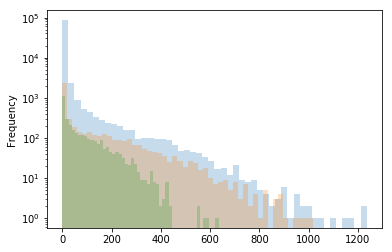

In [85]:
sample[sample['particle_type']==1].loc[:, 'AverageSquaredDistance'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'AverageSquaredDistance'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'AverageSquaredDistance'].plot.hist(bins=50, alpha=0.25, logy=True)

In [203]:
thre = 15.8
bool_muon = sample['particle_type']==1
bool_muon_asd_under_thre = ((sample['particle_type']==1) & (sample['AverageSquaredDistance'] < thre))
print(bool_muon.sum(), bool_muon_asd_under_thre.sum(), bool_muon_asd_under_thre.sum()*100.0/bool_muon.sum())
bool_pion = sample['particle_type']==0
bool_pion_asd_under_thre = ((sample['particle_type']==0) & (sample['AverageSquaredDistance'] < thre))
print(bool_pion.sum(), bool_pion_asd_under_thre.sum(), bool_pion_asd_under_thre.sum()*100.0/bool_pion.sum())
bool_proton = sample['particle_type']==2
bool_proton_asd_under_thre = ((sample['particle_type']==2) & (sample['AverageSquaredDistance'] < thre))
print(bool_proton.sum(), bool_proton_asd_under_thre.sum(), bool_proton_asd_under_thre.sum()*100.0/bool_proton.sum())

(92187, 82983, 90.01594584919782)
(4668, 2231, 47.79348757497858)
(3145, 1156, 36.75675675675676)


- 確かに、muonだと、AverageSquaredDistance (ASD) は小さいものが支配的っぽい
- 例えば、ASD < 16の場合、muonは、全体90%が条件を満たすのに対し、pionは、48%, protonは、37% !
- ざっとみると、extrapolationの精度が悪い場合、ASDが大きくなっているような気がする

### AverageSquaredDistance2 を作成
- MatchedHit_{X,Y}[i] とLextra_{X,Y}[i]の差を誤差で割るときに、MarchedHit_D{X,Y}[i]で割る代わりに、(MarchedHit_D{X,Y}[i]^2 + Mextra_D{X,Y}2[i])^0.5 で割る
- 外装の不定性の導入を行った

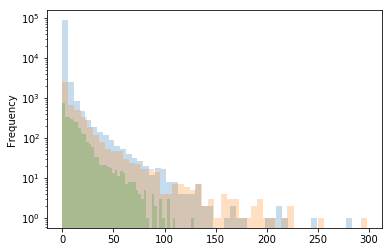

In [63]:
sample[sample['particle_type']==1].loc[:, 'AverageSquaredDistance2'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'AverageSquaredDistance2'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'AverageSquaredDistance2'].plot.hist(bins=50, alpha=0.25, logy=True)

In [208]:
thre = 3.63
bool_muon = sample['particle_type']==1
bool_muon_asd_under_thre = ((sample['particle_type']==1) & (sample['AverageSquaredDistance2'] < thre))
print(bool_muon.sum(), bool_muon_asd_under_thre.sum(), bool_muon_asd_under_thre.sum()*100.0/bool_muon.sum())
bool_pion = sample['particle_type']==0
bool_pion_asd_under_thre = ((sample['particle_type']==0) & (sample['AverageSquaredDistance2'] < thre))
print(bool_pion.sum(), bool_pion_asd_under_thre.sum(), bool_pion_asd_under_thre.sum()*100.0/bool_pion.sum())
bool_proton = sample['particle_type']==2
bool_proton_asd_under_thre = ((sample['particle_type']==2) & (sample['AverageSquaredDistance2'] < thre))
print(bool_proton.sum(), bool_proton_asd_under_thre.sum(), bool_proton_asd_under_thre.sum()*100.0/bool_proton.sum())

(92187, 82996, 90.03004762059726)
(4668, 2085, 44.66580976863753)
(3145, 878, 27.917329093799683)


- 例えば、ASD2 < 3.8の場合、muonは、全体90%が条件を満たすのに対し、pionは、45%, protonは、28% !
- protonが大幅改善している！ (37% -> 28%)

### AverageSquaredDistance3 を作成
- MatchedHit_{X,Y}[i] とLextra_{X,Y}[i]の差を誤差で割るときに、MarchedHit_D{X,Y}[i]で割る代わりに、MarchedHit_D{X,Y}[i]^0.5 * Mextra_D{X,Y}2[i])^0.25 で割る
- 相乗平均にしてみた

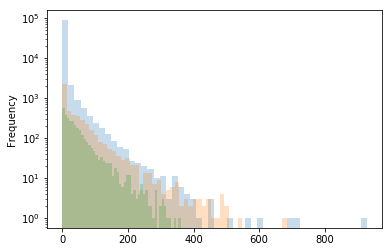

In [102]:
sample[sample['particle_type']==1].loc[:, 'AverageSquaredDistance3'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'AverageSquaredDistance3'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'AverageSquaredDistance3'].plot.hist(bins=50, alpha=0.25, logy=True)

In [213]:
thre = 11.17
bool_muon = sample['particle_type']==1
bool_muon_asd_under_thre = ((sample['particle_type']==1) & (sample['AverageSquaredDistance3'] < thre))
print(bool_muon.sum(), bool_muon_asd_under_thre.sum(), bool_muon_asd_under_thre.sum()*100.0/bool_muon.sum())
bool_pion = sample['particle_type']==0
bool_pion_asd_under_thre = ((sample['particle_type']==0) & (sample['AverageSquaredDistance3'] < thre))
print(bool_pion.sum(), bool_pion_asd_under_thre.sum(), bool_pion_asd_under_thre.sum()*100.0/bool_pion.sum())
bool_proton = sample['particle_type']==2
bool_proton_asd_under_thre = ((sample['particle_type']==2) & (sample['AverageSquaredDistance3'] < thre))
print(bool_proton.sum(), bool_proton_asd_under_thre.sum(), bool_proton_asd_under_thre.sum()*100.0/bool_proton.sum())

(92187, 82985, 90.01811535249004)
(4668, 2083, 44.622964867180805)
(3145, 778, 24.737678855325914)


- 例えば、ASD3 < 11の場合、muonは、全体90%が条件を満たすのに対し、pionは、45%, protonは、25%
- protonが大幅改善している (37% -> 25%)
- AverageSquaredDistance2と比べても、proton, pionともにちょっといい

### AverageSquaredDistance4 を作成
- MatchedHit_{X,Y}[i] とLextra_{X,Y}[i]の差を誤差で割るときに、MarchedHit_D{X,Y}[i]で割る代わりに、(MarchedHit_D{X,Y}[i]^-1 * Mextra_D{X,Y}2[i]^-0.5))^-1 で割る
- 精度を逆数の和にした

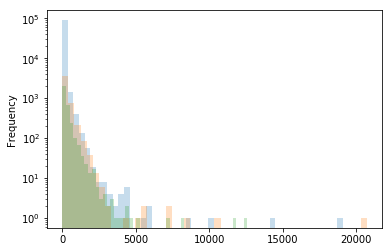

In [178]:
sample[sample['particle_type']==1].loc[:, 'AverageSquaredDistance4'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'AverageSquaredDistance4'].plot.hist(bins=50, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'AverageSquaredDistance4'].plot.hist(bins=50, alpha=0.25, logy=True)

In [218]:
thre = 80.5
bool_muon = sample['particle_type']==1
bool_muon_asd_under_thre = ((sample['particle_type']==1) & (sample['AverageSquaredDistance4'] < thre))
print(bool_muon.sum(), bool_muon_asd_under_thre.sum(), bool_muon_asd_under_thre.sum()*100.0/bool_muon.sum())
bool_pion = sample['particle_type']==0
bool_pion_asd_under_thre = ((sample['particle_type']==0) & (sample['AverageSquaredDistance4'] < thre))
print(bool_pion.sum(), bool_pion_asd_under_thre.sum(), bool_pion_asd_under_thre.sum()*100.0/bool_pion.sum())
bool_proton = sample['particle_type']==2
bool_proton_asd_under_thre = ((sample['particle_type']==2) & (sample['AverageSquaredDistance4'] < thre))
print(bool_proton.sum(), bool_proton_asd_under_thre.sum(), bool_proton_asd_under_thre.sum()*100.0/bool_proton.sum())

(92187, 82978, 90.01052209096727)
(4668, 2197, 47.065124250214225)
(3145, 868, 27.599364069952305)


- 例えば、ASD4 < 80.5の場合、muonは、全体90%が条件を満たすのに対し、pionは、47%, protonは、28%
- **AverageSquaredDistance3が一番良さそう**

## IsMuon

In [162]:
%autoreload

In [163]:
sample = (cv.MeasCalculator()).calc_IsMuon(sample)

In [164]:
sample.head(100)

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
2467173      17       7      11      17   1.882353   2.285714   1.363636   
888551      125      44       7      16   3.624000   3.250000   1.857143   
1971183      31      11      11      11   2.129032   1.272727   1.454546   
4763260      79      26       8      13   2.949367   2.192308   1.250000   
1910341      41      41      11      12   2.512195   2.219512   1.272727   
2228149     106      37      20      21   2.896226   2.756757   2.050000   
755389       43       8       5       7   2.883721   1.375000   1.200000   
3310235     101      41       8      11   3.524752   2.682927   1.625000   
3467332     103      57      11      22   2.475728   3.140351   1.090909   
741137       40      12       8      17   1.725000   2.916667   1.375000   
4272631      71      27       6       6   2.521127   2.888889   1.000000   
111450      127      46      11      17   3.196850   3.304348   1.272727   
3465123      21       5       1       6   2.190476   1.200000   1.000000   
1727021      91      23      13      14   3.780220   2.043478   1.692308   
2855953     152      21       7      13   2.947368   3.000000   1.285714   
5385759      61      22      13      10   2.704918   2.272727   1.076923   
3202385     109      12       7      15   3.284404   1.416667   2.285714   
3811056      59      17      17      14   3.711864   3.529412   1.764706   
316826       77      31      33      23   3.597403   4.000000   1.393939   
2693734      82      35      21      16   4.073171   1.771429   1.238095   
263192       29       4       9       8   1.896552   1.500000   1.222222   
4096596      16       6       4       4   1.062500   1.666667   1.500000   
1791920      61       9       5       7   2.131148   1.222222   1.000000   
3463988      25       8       6      10   1.960000   1.875000   1.166667   
5177807      86      36      18      10   2.209302   2.472222   1.555556   
1406386      83      19      32      14   2.795181   2.473684   1.718750   
1173120      56      38       7       7   1.839286   2.868421   1.285714   
4297843      25      10       5      15   2.560000   1.600000   1.000000   
1014517      31      11      10      14   2.935484   3.454546   1.100000   
2162515      43      12       5      14   3.093023   1.333333   1.000000   
...         ...     ...     ...     ...        ...        ...        ...   
4093921      63      48      25       9   2.253968   3.062500   1.520000   
2807791      82      18      11      20   3.085366   1.777778   1.636364   
5024118      60      19      14      19   2.066667   2.368421   2.214286   
4684734      63      13      19      12   3.396825   2.230769   1.947368   
1665426      44      39      11      35   1.477273   3.205128   1.636364   
283496       66      18       5       5   2.893940   4.111111   1.400000   
2448459      70      19      11       8   2.157143   1.526316   1.272727   
5309052     123      13      13       9   2.382114   1.384615   2.461539   
850878      102      24       9      10   2.558824   1.666667   1.222222   
3034938      31       9       8      11   2.580645   1.222222   1.250000   
1038216      78      28      13      14   2.730769   2.428571   1.230769   
5221661      73      18      32      17   2.972603   1.277778   1.687500   
3441186     119      36      24      18   2.840336   2.722222   1.500000   
2831406      17      16      22      18   1.941176   1.375000   1.500000   
4046222      52       4       9      10   4.980769   1.500000   1.444444   
4648047     118      31      24      33   2.288136   2.290322   1.291667   
455762       57      19      12      13   1.736842   2.473684   1.083333   
2915188      58       8      11      24   2.620690   1.250000   1.363636   
3032975      20       9      18      11   1.550000   1.333333   2.277778   
2004577      38      20      17      12   2.236842   2.250000   1.411765   
1286764      21      23       7       7   2.666667   2.13

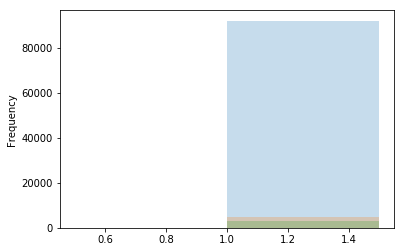

In [165]:
sample[sample['particle_type']==1].loc[:, 'IsMuon'].plot.hist(bins=2, alpha=0.25)#, logy=True)
sample[sample['particle_type']==0].loc[:, 'IsMuon'].plot.hist(bins=2, alpha=0.25)#, logy=True)
sample[sample['particle_type']==2].loc[:, 'IsMuon'].plot.hist(bins=2, alpha=0.25)#, logy=True)

In [169]:
bool_muon = sample['particle_type']==1
bool_muon_ismuon = ((sample['particle_type']==1) & (sample['IsMuon'] ==1))
print(bool_muon.sum(), bool_muon_ismuon.sum(), bool_muon_ismuon.sum()*100.0/bool_muon.sum())

(92187, 92187, 100.0)


- 今回のデータ・セットは、すべてIsMuonを満たしている
- **IsMuonは今回役に立たない**